# Load Data

In [1]:
from sqlalchemy import create_engine
import pandas as pd

conn = create_engine('duckdb:///../../data/logs.ddb')
df = pd.read_sql('SELECT * FROM logs', conn)
print('size:', len(df))

size: 991


# Clean & Normalize


In [2]:
mask = (
    (df['message'] == '') |
    (df['time'] < pd.Timestamp('2024-04', tz='UTC'))
)

df = df[~mask]
print('size:', len(df))

# info -> INFO
df.loc[df['level'] == 'info', 'level'] = 'INFO'

size: 976


# Count by Level

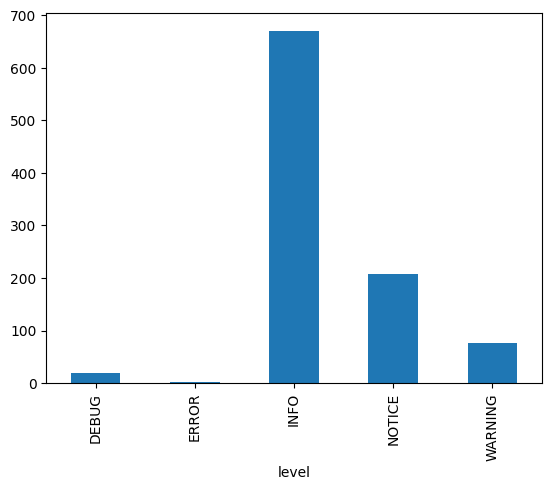

In [7]:
df.groupby('level').count()['time'].plot.bar();